# Correlation plots in levlat:

## Div imports

In [3]:
import matplotlib.colors as colors
# load and autoreload
from IPython import get_ipython
from useful_scit.imps import (plt)
import matplotlib.ticker as mtick
from useful_scit.util.zarray import corr
from sect_sens.util.plot.plot_levlat import plot_levlat

from sect_sens.constants import get_plotpath
from sect_sens.data_info import get_nice_name_case
from sect_sens.data_info.simulation_types import get_casen_by_type_mod
from sect_sens.util.imports.get_fld_fixed import get_field_fixed
from sect_sens.util.naming_conventions.var_info import get_fancy_var_name
from sect_sens.util.plot.plot_levlat import make_cbar_kwargs
from sect_sens.util.practical_functions import make_folders

# noinspection PyBroadException
try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

from useful_scit.plot.fig_manip import subp_insert_abc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Div settings

In [4]:
model = 'NorESM'

In [5]:
startyear = '0004-01'
endyear = '0008-12'
p_level = 1013.
pmin = 850.  # minimum pressure level
avg_over_lev = True  # True#True#False#True
pressure_adjust = True  # Can only be false if avg_over_lev false. Plots particular hybrid sigma lev
p_levels = [1013., 900., 800., 700., 600.]  # used if not avg

## Cases

In [6]:
cases_sec = [
    'NF1850_SECT_ctrl',
    'NF1850_aeroxid2014_SECT_ctrl'
]
cases_orig = [
    'NF1850_noSECT_def',
    'NF1850_aeroxid2014_noSECT_def',
    'NF1850_aeroxid2014_noSECT_ox_ricc',
    'NF1850_noSECT_ox_ricc'
]
PI = ['NF1850_SECT_ctrl', 'NF1850_noSECT_def', 'NF1850_noSECT_ox_ricc']
PD = ['NF1850_aeroxid2014_SECT_ctrl', 'NF1850_aeroxid2014_noSECT_def', 'NF1850_aeroxid2014_noSECT_ox_ricc']
cases = cases_orig + cases_sec

## File naming: 


In [8]:
version = 'corrs'
plot_path = get_plotpath('levlat')
filen_base = plot_path + '/_%s' % version
# print(plot_path)
make_folders(plot_path)

## Variables to load: 

In [9]:
subfig_size = 2.9
asp_ratio = .9

In [10]:
# varlist = ['NCONC01', 'NMR01', 'AWNC_incld', 'AREL_incld']
varlist = ['N_AER', 'SOA_A1', 'SO4_A1', 'NMR01', 'NCONC01', 'AWNC_incld', 'AREL_incld', 'N50', 'N100', 'N150', 'N200']

### Div settings:

In [11]:
cbar_orientation = 'vertical'
cases_ctrl = cases_orig
case_oth = cases_sec[0]
ncol = len(cases_ctrl)
nrow = len(varlist)
subfig_size = 2.5
asp_ratio = 1.6
figsize = [subfig_size * ncol * asp_ratio, subfig_size * nrow]
# noinspection PyTypeChecker

norm_dic = dict(
    SOA_LV=colors.SymLogNorm(vmin=-1e-1, vmax=1e-1, linthresh=.01, base=10),
    H2SO4=colors.SymLogNorm(vmin=-1e-1, vmax=1e-1, linthresh=.01, base=10),
    NCONC01=colors.SymLogNorm(vmin=-1e3, vmax=1e3, linthresh=10, base=10),
    NMR01=colors.SymLogNorm(vmin=-10, vmax=10, linthresh=1, base=10),  # linscale=.5),
    AWNC_incld=colors.SymLogNorm(vmin=-50, vmax=50, linthresh=1, base=10),
    AREL_incld=colors.SymLogNorm(vmin=-5, vmax=5, linthresh=.1, base=10)
)

### Load data:

In [12]:
var_subl = ['SOA_A1', 'NCONC01', 'AWNC_incld', 'AREL_incld', 'NMR01', 'HYGRO01', 'N_AER', 'N50', 'N100', 'N150', 'N200']
cases_dic = {}
for case in cases:
    dummy = get_field_fixed(case,
                            var_subl,
                            startyear, endyear,
                            pressure_adjust=pressure_adjust)
    cases_dic[case] = dummy.copy()

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


In [13]:
cases_ctrl = cases_orig
case_oth = cases_sec[0]

## Plot functions: 

In [14]:
def corr_plt(var_c=None, varl_to=None, cases_ctrl=None,
             case_oth=None, subfig_size=2.5, axs=None, fig=None):
    if var_c is None:
        var_c = 'AWNC_incld'
    if varl_to is None:
        varl_to = ['NCONC01', 'NMR01']
    cbar_orientation = 'vertical'
    if cases_ctrl is None:
        cases_ctrl = cases_orig
    if case_oth is None:
        case_oth = cases_sec[0]
    ncol = len(cases_ctrl)
    nrow = len(varl_to)

    asp_ratio = 1.6
    figsize = [subfig_size * ncol * asp_ratio, subfig_size * nrow]
    # noinspection PyTypeChecker
    if fig is None:
        fig, axs = plt.subplots(nrow, ncol, figsize=figsize, sharex=True, sharey=True)
    print(var_c, varl_to)
    for j, var in enumerate(varl_to):

        if nrow == 1:
            saxs = axs
        else:
            saxs = axs[j, :]
        for i, case in enumerate(cases_ctrl):
            ax = saxs[i]
            _vars = [var, var_c]
            print(_vars)
            _ds = cases_dic[case_oth][_vars] - cases_dic[case][_vars]
            _da_corr = corr(_ds[var], _ds[var_c], dim=['time', 'lon'])
            nn_ctrl = get_nice_name_case(case)
            nn_oth = get_nice_name_case(case_oth)
            title = f'x={nn_oth}, y={nn_ctrl}'  # f'Correlation $\Delta V = V_x - V_y$),\n x={nn_oth}, y={nn_ctrl}'
            _da_corr.load()
            label = rf'corr($\Delta${get_fancy_var_name(var)},$\Delta${get_fancy_var_name(var_c)})'  # )
            plt_kwargs = {}
            plt_kwargs = make_cbar_kwargs(label, plt_kwargs, cbar_orientation)

            plot_levlat(ax, 'RdBu_r', _da_corr, title, [1e3, 200],
                        #            cbar_orientation='vertical',
                        #            #ax=ax,
                        #            #norm=norm_dic[var],
                        #            #relative=False,
                        #            #ylim=[1e3, 200],
                        yscale='log', **plt_kwargs)
            ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
            ax.yaxis.set_minor_formatter(mtick.FormatStrFormatter('%.0f'))

    title = fr'Correlations $\Delta V = V_x - V_y$'  # ' x={nn_oth}, y={nn_ctrl}'

    stit = plt.suptitle(title, y=1.03)
    for ax in axs.flatten():
        ax.set_ylabel('')
        ax.set_xlabel('')
    if nrow > 1:
        saxs = axs[:, 0]
    else:
        saxs = [axs[0]]
    for ax in saxs:
        ax.set_ylabel('Pressure [hPa]')
    if nrow > 1:
        saxs = axs[-1, :]
    else:
        saxs = axs

    for ax in saxs:
        ax.set_xlabel(r'Latitude [$^\circ$N]')
    var_s = var_c + '_' + '_'.join(varl_to)
    fn = filen_base + f'corr_{var_s}_{var_c}{case_oth}' + '_'.join(cases_ctrl) + f'{startyear}-{endyear}'
    print(fn)
    return fig, axs, fn, stit

In [15]:
def corr_plt_type(var_c='AWNC_incld', var_to='NCONC01',
                  cases_ctrl=None,
                  case_types=None,
                  case_oth='OsloAeroSec',
                  subfig_size=2.5):
    if case_types is None:
        case_types = ['PI', 'PD']
    if cases_ctrl is None:
        cases_ctrl = ['OsloAero$_{imp}$', 'OsloAero$_{def}$']
    asp_ratio = 1.6
    nrow = len(case_types)
    ncol = len(cases_ctrl)
    figsize = [subfig_size * ncol * asp_ratio, subfig_size * nrow]
    # noinspection PyTypeChecker
    fig, axs = plt.subplots(nrow, ncol, figsize=figsize, sharex=True, sharey=True)
    for i, case_type in enumerate(case_types):
        if nrow == 1:
            saxs = axs
        else:
            saxs = axs[:, i]
        cns_ctrl = [get_casen_by_type_mod(case_type, model_type) for model_type in cases_ctrl]
        cn_oth = get_casen_by_type_mod(case_type, case_oth)
        fig, saxs, fn, stit = corr_plt(var_c=var_c, varl_to=[var_to], cases_ctrl=cns_ctrl,
                                       case_oth=cn_oth,
                                       axs=saxs,
                                       fig=fig)
        for ax, cn in zip(saxs, cases_ctrl):
            ax.set_title(f'{case_type}: x={case_oth}, y={cn}')
    subp_insert_abc(axs, pos_x=1.13, pos_y=1.01)

    cn_str = case_oth.replace('{', '').replace('}', '').replace('$', '')
    cn_str = cn_str + '_'.join(cases_ctrl).replace('{', '').replace('}', '').replace('$', '')
    fn = filen_base + f'corr_{var_to}_{var_c}{cn_str}_{startyear}-{endyear}'
    return fig, axs, fn, stit

## Plots

AWNC_incld ['NCONC01']
['NCONC01', 'AWNC_incld']


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


['NCONC01', 'AWNC_incld']


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_corrscorr_AWNC_incld_NCONC01_AWNC_incldNF1850_SECT_ctrlNF1850_noSECT_ox_ricc_NF1850_noSECT_def0004-01-0008-12
AWNC_incld ['NCONC01']
['NCONC01', 'AWNC_incld']


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


['NCONC01', 'AWNC_incld']


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_corrscorr_AWNC_incld_NCONC01_AWNC_incldNF1850_aeroxid2014_SECT_ctrlNF1850_aeroxid2014_noSECT_ox_ricc_NF1850_aeroxid2014_noSECT_def0004-01-0008-12


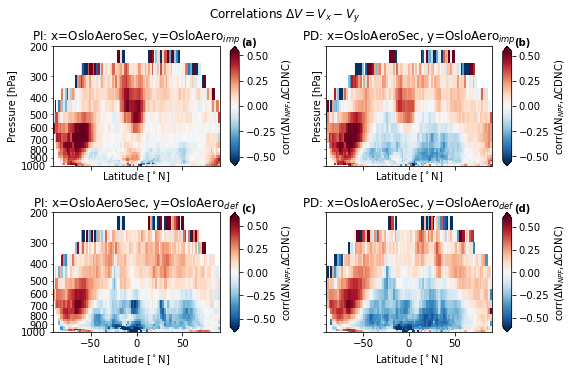

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_corrscorr_NCONC01_AWNC_incldOsloAeroSecOsloAero_imp_OsloAero_def_0004-01-0008-12


In [16]:
fig, axs, fn, stit = corr_plt_type()
plt.tight_layout()

plt.savefig(fn + '.pdf', bbox_extra_artists=(stit,), bbox_inches='tight')
plt.savefig(fn + '.png', bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

AWNC_incld ['NCONC01']
['NCONC01', 'AWNC_incld']


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


['NCONC01', 'AWNC_incld']


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_corrscorr_AWNC_incld_NCONC01_AWNC_incldNF1850_SECT_ctrlNF1850_noSECT_def_NF1850_noSECT_ox_ricc0004-01-0008-12


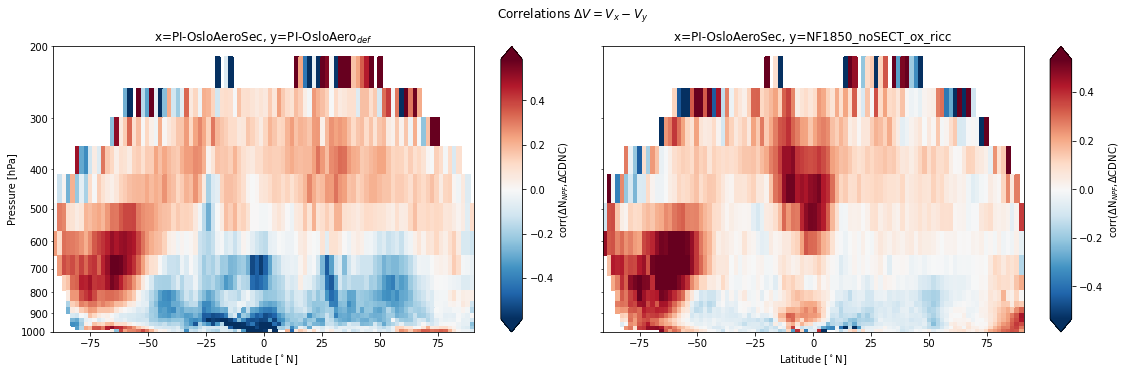

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_corrscorr_AWNC_incld_NCONC01_AWNC_incldNF1850_SECT_ctrlNF1850_noSECT_def_NF1850_noSECT_ox_ricc0004-01-0008-12


In [17]:
# PI
var_c = 'AWNC_incld'
# varl_to=['SOA_A1','N_AER']
varl_to = ['NCONC01']  # ,'NMR01']
fig, axs, fn, stit = corr_plt(case_oth=PI[0],
                              cases_ctrl=PI[1:],
                              subfig_size=5,
                              var_c=var_c,
                              varl_to=varl_to
                              )
fig.tight_layout()

plt.savefig(fn + '.pdf', bbox_extra_artists=(stit,), bbox_inches='tight')
plt.savefig(fn + '.png', bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

AWNC_incld ['NCONC01']
['NCONC01', 'AWNC_incld']


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


['NCONC01', 'AWNC_incld']


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_corrscorr_AWNC_incld_NCONC01_AWNC_incldNF1850_aeroxid2014_SECT_ctrlNF1850_aeroxid2014_noSECT_def_NF1850_aeroxid2014_noSECT_ox_ricc0004-01-0008-12


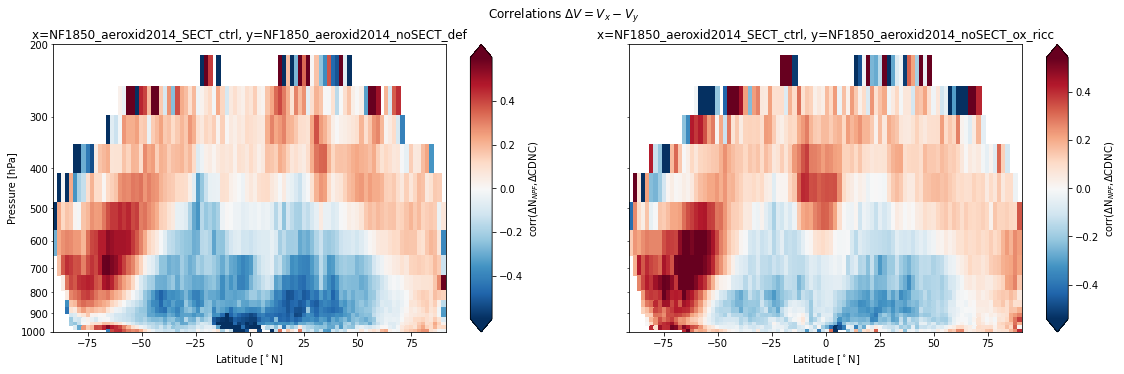

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_corrscorr_AWNC_incld_NCONC01_AWNC_incldNF1850_aeroxid2014_SECT_ctrlNF1850_aeroxid2014_noSECT_def_NF1850_aeroxid2014_noSECT_ox_ricc0004-01-0008-12


In [18]:
# PD atm
var_c = 'AWNC_incld'
# varl_to=['SOA_A1','N_AER']
varl_to = ['NCONC01']  # ,'NMR01']
fig, axs, fn, stit = corr_plt(case_oth=PD[0],
                              cases_ctrl=PD[1:],
                              subfig_size=5,
                              var_c=var_c,
                              varl_to=varl_to)
fig.tight_layout()

plt.savefig(fn + '.pdf', bbox_extra_artists=(stit,), bbox_inches='tight')
plt.savefig(fn + '.png', bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

AWNC_incld ['N50', 'N150', 'N200']
['N50', 'AWNC_incld']


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


['N50', 'AWNC_incld']


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


['N150', 'AWNC_incld']


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


['N150', 'AWNC_incld']


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


['N200', 'AWNC_incld']


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


['N200', 'AWNC_incld']


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_corrscorr_AWNC_incld_N50_N150_N200_AWNC_incldNF1850_SECT_ctrlNF1850_noSECT_def_NF1850_noSECT_ox_ricc0004-01-0008-12


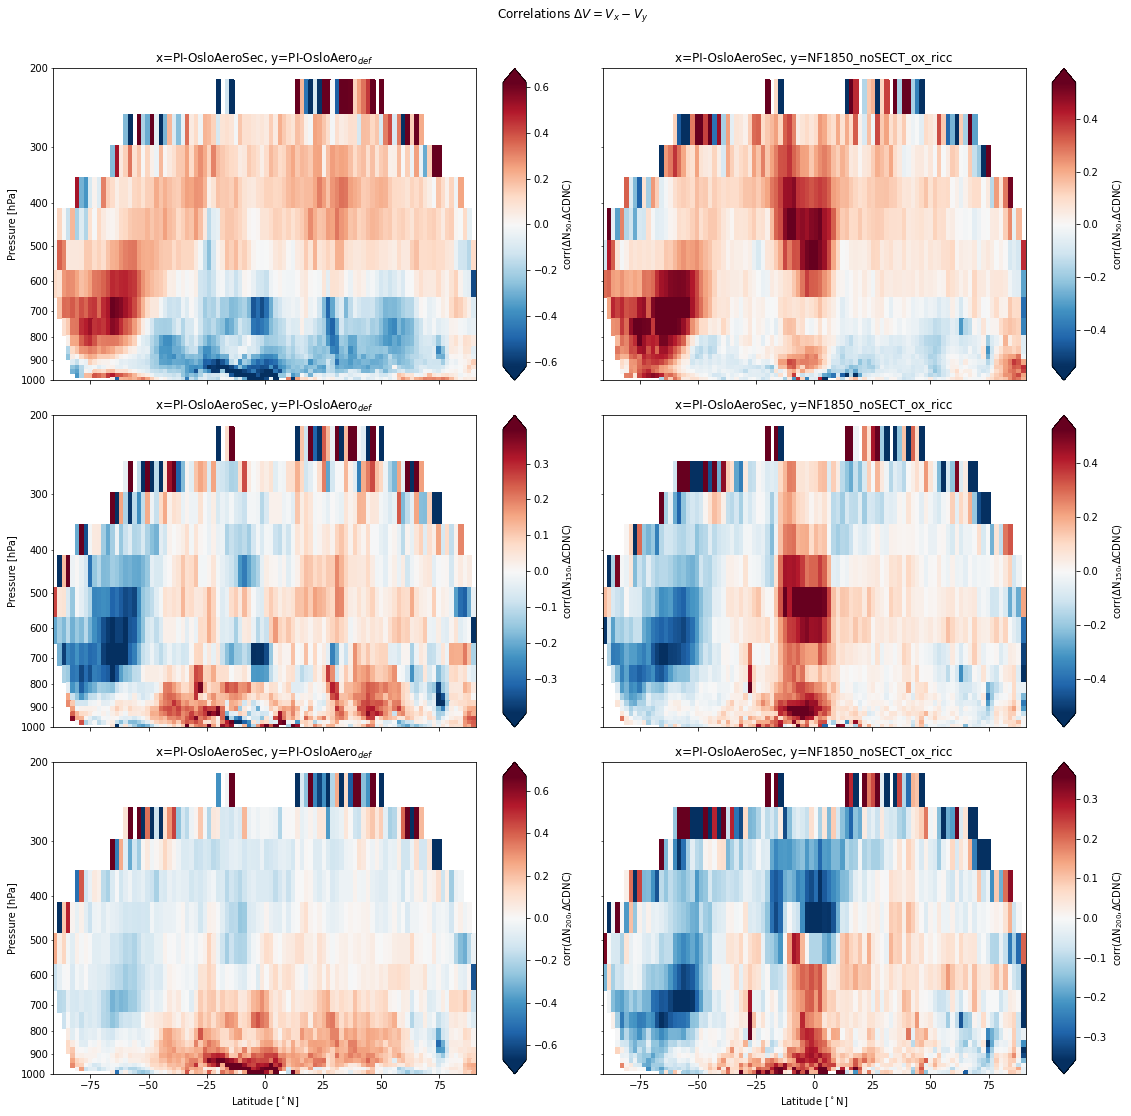

In [19]:
# PD atm
var_c = 'AWNC_incld'
# varl_to=['SOA_A1','N_AER']
varl_to = ['N50', 'N150', 'N200']  # ,'NMR01']
fig, axs, fn, stit = corr_plt(case_oth=PI[0],
                              cases_ctrl=PI[1:],
                              subfig_size=5,
                              var_c=var_c,
                              varl_to=varl_to
                              )
fig.tight_layout()

plt.savefig(fn + '.pdf', bbox_extra_artists=(stit,), bbox_inches='tight')
plt.savefig(fn + '.png', bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()

In [20]:
print(fn)

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_corrscorr_AWNC_incld_N50_N150_N200_AWNC_incldNF1850_SECT_ctrlNF1850_noSECT_def_NF1850_noSECT_ox_ricc0004-01-0008-12


In [ ]:
# PD atm
var_c = 'AWNC_incld'
# varl_to=['SOA_A1','N_AER']
varl_to = ['N50', 'N150', 'N200']  # ,'NMR01']
fig, axs, fn, stit = corr_plt(case_oth=PD[0],
                              cases_ctrl=PD[1:],
                              subfig_size=5,
                              var_c=var_c,
                              varl_to=varl_to
                              )
fig.tight_layout()

plt.savefig(fn + '.pdf', bbox_extra_artists=(stit,), bbox_inches='tight')
plt.savefig(fn + '.png', bbox_extra_artists=(stit,), bbox_inches='tight')
plt.show()
print(fn)

AWNC_incld ['N50', 'N150', 'N200']
['N50', 'AWNC_incld']


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


['N50', 'AWNC_incld']


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


['N150', 'AWNC_incld']


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


['N150', 'AWNC_incld']


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


['N200', 'AWNC_incld']


In [ ]:
fig, axs, fn, stit = corr_plt(
    var_c='AWNC_incld',
    varl_to=['SOA_A1', 'N_AER'],
    case_oth=PI[0],
    cases_ctrl=PI[1:],
    subfig_size=5
)
fig.tight_layout()

# plt.savefig(fn + '.pdf', bbox_extra_artists=(stit,),bbox_inches='tight')
# plt.savefig(fn + '.png',bbox_extra_artists=(stit,),bbox_inches='tight')
plt.show()
print(fn)